In [1]:
# opencv-python
import cv2
# mediapipe人工智能工具包
import mediapipe as mp
#进度条库
from tqdm import tqdm
#时间库
import time
#导入python绘图matplotlib
import matplotlib.pyplot as plt
#使用ipython的魔法方法，将绘制出的图像直接嵌入在notebook单元格中
%matplotlib inline
import numpy as np

#定义可视化图像函数
def look_img(img):
    #" ' opencv读入图像格式为BGR, matplotlib可视化格式为RGB,因此需将BGR转RGB''
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_RGB)
    plt.show()

### 导入模型

In [2]:
#导入solution
mp_pose = mp.solutions.pose
# #导入绘图函数
mp_drawing = mp.solutions.drawing_utils

#导入模型
pose = mp_pose.Pose (static_image_mode=True,
                                #是静态图片还是连续视频帧
                                model_complexity=1,
                                #选择人体姿态关键点检测模型，0性能差但快，2性能好但慢，1介于两者之间
                                smooth_landmarks=True,
                                #是否平滑关键点
                                enable_segmentation=True,
                                #是否人体抠图
                                min_detection_confidence=0.5, #置信度阈值
                                min_tracking_confidence=0.5) # 追踪阈值

### 读入图像，输入模型,获取预测结果

In [3]:
#从图片文件读入图像，opencv读入为BGR格式
img = cv2.imread('C:/Users/111/Pictures/Camera Roll/p2212365691.jpg')
# look_img(img)

# BGR转RGB
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB )

#将RGB图像输入模型,获取预测结果
results =pose.process(img_RGB)

In [4]:
results

mediapipe.python.solution_base.SolutionOutputs

### 人体抠图结果

In [5]:
mask = results.segmentation_mask

In [6]:
mask.shape  # 单通道

(1417, 1080)

In [7]:
img.shape

(1417, 1080, 3)

In [8]:
mask  # 每个像素对应人体的概率

array([[2.4641309e-08, 2.4636703e-08, 2.4632095e-08, ..., 2.6335449e-08,
        2.6314400e-08, 2.6282828e-08],
       [2.4580034e-08, 2.4595604e-08, 2.4590749e-08, ..., 2.6265443e-08,
        2.6245294e-08, 2.6215075e-08],
       [2.4539183e-08, 2.4533954e-08, 2.4526109e-08, ..., 2.6160428e-08,
        2.6132236e-08, 2.6113440e-08],
       ...,
       [3.9973507e-08, 4.0272631e-08, 4.0472045e-08, ..., 3.1599374e-08,
        3.1378946e-08, 3.1048305e-08],
       [4.0129866e-08, 4.0319406e-08, 4.0527830e-08, ..., 3.1584072e-08,
        3.1367374e-08, 3.1034673e-08],
       [4.0167635e-08, 4.0389573e-08, 4.0722476e-08, ..., 3.1573880e-08,
        3.1350019e-08, 3.1014228e-08]], dtype=float32)

In [9]:
mask=mask>0.5

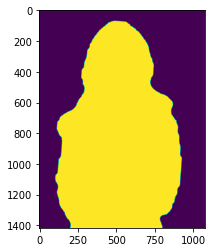

In [10]:
plt.imshow(mask)
plt.show()

In [11]:
#单通道转三通道
mask_3 = np.stack( (mask, mask,mask), axis=-1)
MASK_COLOR = [0,200,0]
fg_image=np.zeros (img.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR

#获得前景人像
FG_img = np.where(mask_3, img, fg_image)
#获得抠掉前景人像的背景
BG_img = np.where(~mask_3, img, fg_image)

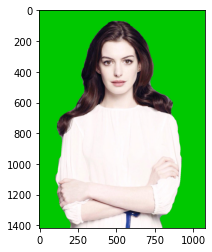

In [12]:
look_img(FG_img)  # 前景

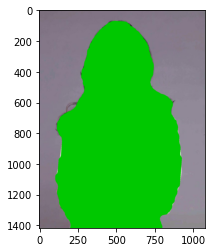

In [13]:
look_img(BG_img)  # 背景

### 所有关键点检测结果

In [14]:
results.pose_landmarks  # 33个关键点坐标

landmark {
  x: 0.48440054059028625
  y: 0.2796918749809265
  z: -2.1130709648132324
  visibility: 0.9996746778488159
}
landmark {
  x: 0.5243368744850159
  y: 0.23775780200958252
  z: -2.028658628463745
  visibility: 0.9991589784622192
}
landmark {
  x: 0.5439596772193909
  y: 0.2377414107322693
  z: -2.02903413772583
  visibility: 0.999140739440918
}
landmark {
  x: 0.5633163452148438
  y: 0.23764395713806152
  z: -2.028709650039673
  visibility: 0.9989145994186401
}
landmark {
  x: 0.4466286599636078
  y: 0.23914039134979248
  z: -2.030575752258301
  visibility: 0.999489426612854
}
landmark {
  x: 0.4218384325504303
  y: 0.24020236730575562
  z: -2.0311477184295654
  visibility: 0.999573290348053
}
landmark {
  x: 0.3999076187610626
  y: 0.2421870231628418
  z: -2.0322089195251465
  visibility: 0.9995793700218201
}
landmark {
  x: 0.5924099087715149
  y: 0.2602373957633972
  z: -1.4348562955856323
  visibility: 0.9989827275276184
}
landmark {
  x: 0.38098686933517456
  y: 0.26646167

In [15]:
mp_pose.POSE_CONNECTIONS  # 关键点之间如何连接的

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [16]:
#左胳膊肘关键点的归一化坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW]

x: 0.7457594871520996
y: 0.8869649767875671
z: -1.039640188217163
visibility: 0.961087167263031

In [17]:
#左胳膊时关键点的归一化坐标
results.pose_landmarks.landmark[13]
# Z 坐标靠近屏幕为负，远离屏幕为正

x: 0.7457594871520996
y: 0.8869649767875671
z: -1.039640188217163
visibility: 0.961087167263031

In [18]:
#左胳膊时关键点的归一化坐标
results.pose_landmarks.landmark[13].x

0.7457594871520996

### 解析指定关键点的像素坐标

In [19]:
# 上面是归一化后与原照片的比例坐标
# 要还原为真实坐标需要乘照片的长宽
img.shape  

(1417, 1080, 3)

In [20]:
h=img.shape[0]
w=img.shape[1]

In [21]:
#左胳膊肘关键点像素横坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].x*w

805.4202461242676

In [22]:
# 左胳膊肘关键点像素纵坐标
results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ELBOW].y*h

1256.8293721079826

### 解析指定米键点的真实物理(米)坐标

In [23]:
results.pose_world_landmarks.landmark [mp_pose.PoseLandmark.NOSE]

x: -0.0013185814023017883
y: -0.5821840167045593
z: -0.3828795254230499
visibility: 0.9996746778488159

In [24]:
results.pose_world_landmarks.landmark [23]

x: 0.10767136514186859
y: 0.009809661656618118
z: 0.011002673767507076
visibility: 0.49459558725357056

#### 真实物理坐标的原点位于左右髋关节连线的中点(肚脐附近), 详见论文。

## 交互式三维可视化

In [25]:
import numpy as np

In [26]:
coords=np.array(results.pose_landmarks.landmark)

In [27]:
coords

array([x: 0.48440054059028625
       y: 0.2796918749809265
       z: -2.1130709648132324
       visibility: 0.9996746778488159, x: 0.5243368744850159
                                       y: 0.23775780200958252
                                       z: -2.028658628463745
                                       visibility: 0.9991589784622192,
       x: 0.5439596772193909
       y: 0.2377414107322693
       z: -2.02903413772583
       visibility: 0.999140739440918, x: 0.5633163452148438
                                      y: 0.23764395713806152
                                      z: -2.028709650039673
                                      visibility: 0.9989145994186401,
       x: 0.4466286599636078
       y: 0.23914039134979248
       z: -2.030575752258301
       visibility: 0.999489426612854, x: 0.4218384325504303
                                      y: 0.24020236730575562
                                      z: -2.0311477184295654
                                      visibility:

In [28]:
len(coords)

33

In [29]:
coords[0].x

0.48440054059028625

In [47]:
# 上面的数据类型需要转为np.array 才能在open3d中使用
#在不用耗时循环的条件下，汇总所有点的XYZ坐标
def get_x(each):
    return each.x
def get_y(each):
    return each.y
def get_z(each):
    return each.z

#分别获取所有关键点的XTZ坐标
points_x = np.array(list(map(get_x, coords)))
points_y = np.array(list(map(get_y, coords)))
points_z = np.array(list(map(get_z, coords)))

# 将三个方向的坐标合并
points=np.vstack((points_x,points_y,points_z)).T

In [48]:
points.shape

(33, 3)

In [49]:
points,type(points)

(array([[ 0.48440054,  0.27969187, -2.11307096],
        [ 0.52433687,  0.2377578 , -2.02865863],
        [ 0.54395968,  0.23774141, -2.02903414],
        [ 0.56331635,  0.23764396, -2.02870965],
        [ 0.44662866,  0.23914039, -2.03057575],
        [ 0.42183843,  0.24020237, -2.03114772],
        [ 0.39990762,  0.24218702, -2.03220892],
        [ 0.59240991,  0.2602374 , -1.4348563 ],
        [ 0.38098687,  0.26646167, -1.41883957],
        [ 0.52351141,  0.32599378, -1.88146961],
        [ 0.43801355,  0.32577914, -1.88066959],
        [ 0.74404252,  0.49351284, -1.00911367],
        [ 0.25004548,  0.51053917, -1.01293027],
        [ 0.74575949,  0.88696498, -1.03964019],
        [ 0.2158367 ,  0.87419659, -1.1352098 ],
        [ 0.32776651,  0.8343007 , -1.35509026],
        [ 0.59628373,  0.84625983, -1.53645611],
        [ 0.23787926,  0.85946405, -1.46235156],
        [ 0.6998924 ,  0.84890711, -1.67625225],
        [ 0.23811656,  0.81930572, -1.41317141],
        [ 0.70153356

In [51]:
import open3d

point_cloud =open3d.geometry.PointCloud()

point_cloud.points = open3d.utility.Vector3dVector(points)

open3d.visualization.draw_geometries([point_cloud])